In [64]:
import pandas as pd

In [65]:
df2 = pd.read_csv('../data/casual_data_windows.csv')

df2_file_cleaned = pd.DataFrame({
    'Question': df2.iloc[:, 1],
    'Response': df2.iloc[:, 2]
}).dropna()
df2_file_cleaned.head(5)

,Question,Response
0,What kind of phone(s) do you guys have?,I have a pixel. It's pretty great. Much better...
1,I have a pixel. It's pretty great. Much better...,Does it really charge all the way in 15 min?
2,Does it really charge all the way in 15 min?,"Pretty fast. I've never timed it, but it's und..."
3,What kind of phone(s) do you guys have?,Samsung Galaxy J1. It's my first cell phone an...
4,Samsung Galaxy J1. It's my first cell phone an...,What do you think of it? Anything you don't like?


In [66]:
df3 = df = pd.read_csv('../data/dialogs.txt', sep='\t', header=None, names=['Question', 'Response'])
df3.head(10)

,Question,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
5,i've been good. i'm in school right now.,what school do you go to?
6,what school do you go to?,i go to pcc.
7,i go to pcc.,do you like it there?
8,do you like it there?,it's okay. it's a really big campus.
9,it's okay. it's a really big campus.,good luck with school.


In [67]:
df_combined = pd.concat([df2_file_cleaned, df3], ignore_index=True)
df_combined['Question_Length'] = df_combined['Question'].apply(len)
df_combined['Response_Length'] = df_combined['Response'].apply(len)
df_combined.head()

,Question,Response,Question_Length,Response_Length
0,What kind of phone(s) do you guys have?,I have a pixel. It's pretty great. Much better...,39,71
1,I have a pixel. It's pretty great. Much better...,Does it really charge all the way in 15 min?,71,44
2,Does it really charge all the way in 15 min?,"Pretty fast. I've never timed it, but it's und...",44,63
3,What kind of phone(s) do you guys have?,Samsung Galaxy J1. It's my first cell phone an...,39,73
4,Samsung Galaxy J1. It's my first cell phone an...,What do you think of it? Anything you don't like?,73,49


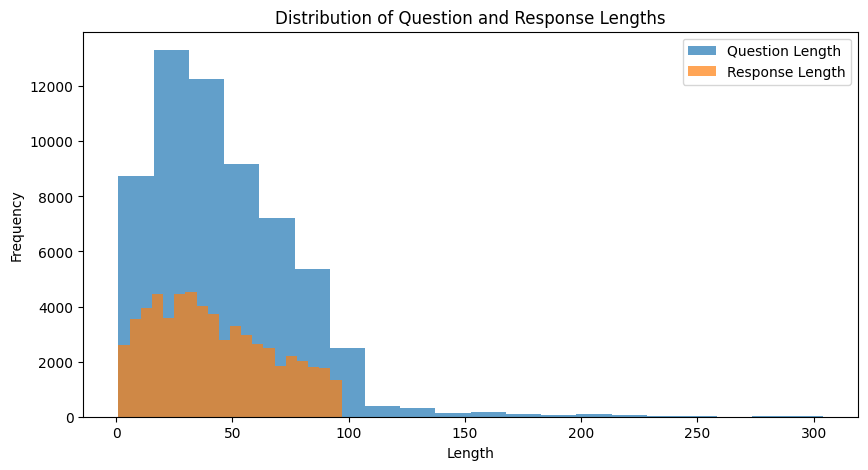

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_combined['Question_Length'], bins=20, alpha=0.7, label='Question Length')
plt.hist(df_combined['Response_Length'], bins=20, alpha=0.7, label='Response Length')
plt.legend(loc='upper right')
plt.title('Distribution of Question and Response Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

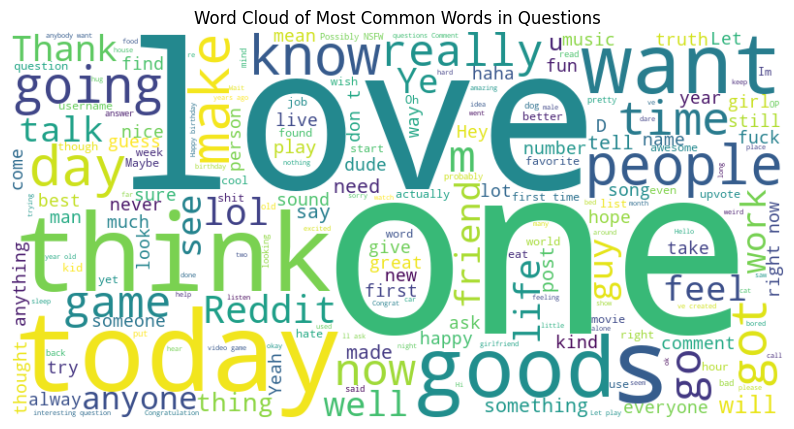

In [69]:
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

all_questions = ' '.join(df_combined['Question'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Questions')
plt.show()

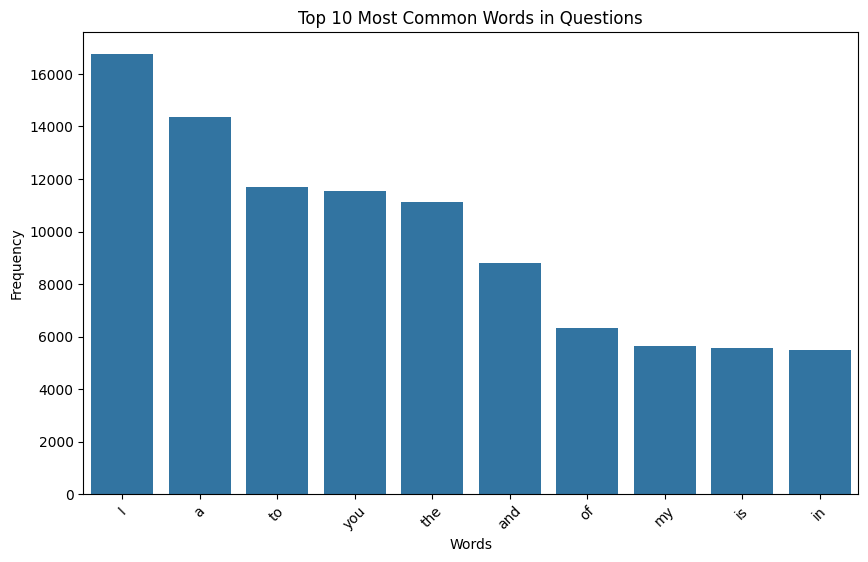

In [70]:
words = all_questions.split()
word_freq = Counter(words)
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Common Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

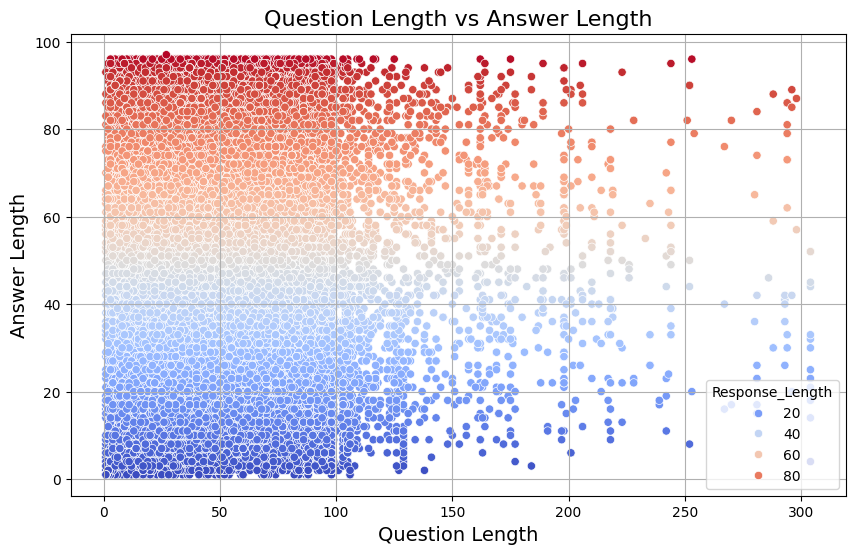

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Question_Length', y='Response_Length', data=df_combined, hue='Response_Length', palette='coolwarm')
plt.title('Question Length vs Answer Length', fontsize=16)
plt.xlabel('Question Length', fontsize=14)
plt.ylabel('Answer Length', fontsize=14)
plt.grid(True)
plt.show()

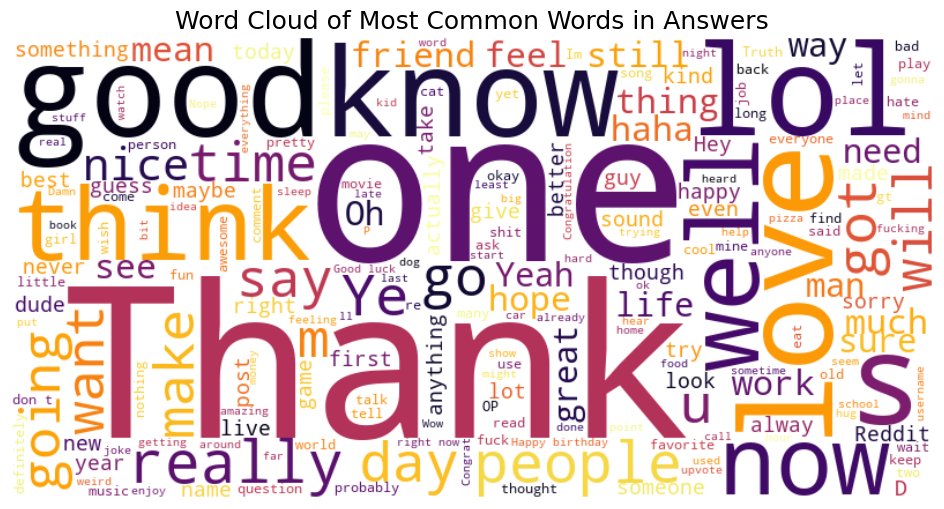

In [73]:
all_answers = ' '.join(df_combined['Response'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_answers)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Answers', fontsize=18)
plt.show()